In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import h5py

import numpy as np
import pandas as pd

import glob

In [10]:
metrics = ['rmse', 'ssim', 'avg_abs_error','median_error_max_true','relative_norm']
metrics_names = ['RMSE [$N/m^2$]', 'SSIM [-]', 'Mean Abs\nError [$N/m^2$]','Median Error/\nMax True [-]','Relative Norm [-]']
number_of_metrics = len(metrics)

events_train = ['Event0001','Event0002','Event0004','Event0006','Event0007','Event0008','Event0010','Event0011']
events_test = ['Event0000','Event0003','Event0005','Event0009']

Edges_1/models_output/Event0001\unet_PINN_RES_E500.csv
Edges_1/models_output/Event0002\unet_PINN_RES_E500.csv
Edges_1/models_output/Event0004\unet_PINN_RES_E500.csv
Edges_1/models_output/Event0006\unet_PINN_RES_E500.csv
Edges_1/models_output/Event0007\unet_PINN_RES_E500.csv
Edges_1/models_output/Event0008\unet_PINN_RES_E500.csv
Edges_1/models_output/Event0010\unet_PINN_RES_E500.csv
Edges_1/models_output/Event0011\unet_PINN_RES_E500.csv
plot
Edges_2/models_output/Event0001\unet_PINN_RES_E500.csv
Edges_2/models_output/Event0002\unet_PINN_RES_E500.csv
Edges_2/models_output/Event0004\unet_PINN_RES_E500.csv
Edges_2/models_output/Event0006\unet_PINN_RES_E500.csv
Edges_2/models_output/Event0007\unet_PINN_RES_E500.csv
Edges_2/models_output/Event0008\unet_PINN_RES_E500.csv
Edges_2/models_output/Event0010\unet_PINN_RES_E500.csv
Edges_2/models_output/Event0011\unet_PINN_RES_E500.csv
plot
Edges_1/models_output/Event0000\unet_PINN_RES_E500.csv
Edges_1/models_output/Event0003\unet_PINN_RES_E500.csv


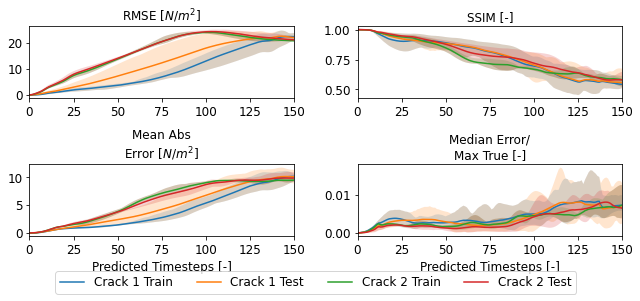

In [11]:
unique_models = []
for path in glob.glob(f'Edges_*/models_output/*/*.csv'):
    unique_models.append(path.split('\\')[3].split('_')[0])

list_unique_models = np.unique(np.array(unique_models))


fig, axs = plt.subplots(2,2,figsize=(9,4))
axs = axs.ravel()

for (i, ax), metric in zip(enumerate(axs),metrics):
    for events in [events_train,events_test]:
        df_norm = pd.DataFrame()
        for edge in ['Edges_1','Edges_2']:
            for event in events:
                for path in glob.glob(f'{edge}/models_output/{event}/{list_unique_models[0]}*.csv'): 
                    print(path)

                    df = pd.read_csv(path,index_col=0)
                    df_norm[path.split('.')[0]] = df[metric]

            print('plot')
            ax.plot(df_norm.mean(axis=1))
            ax.fill_between(df_norm.index,df_norm.min(axis=1),df_norm.max(axis=1),alpha=0.2)
            ax.tick_params(labelsize=12)
            if i >1:
                ax.set_xlabel('Predicted Timesteps [-]',fontsize=12)
            ax.set_xlim(0,150)

    # Set TitleName
    ax.set_title(metrics_names[i])
plt.tight_layout()

plt.legend(labels=['Crack 1 Train','Crack 1 Test','Crack 2 Train', 'Crack 2 Test'],bbox_to_anchor=(.85,-0.4),ncol=4,fontsize=12)

#plt.savefig('edges_crack_1_2_metrics.pdf',dpi=300,bbox_inches='tight')

In [41]:
metrics = ['rmse', 'ssim', 'avg_abs_error','median_error_max_true','relative_norm']
metrics_names = ['RMSE [$N/m^2$]', 'SSIM [-]', 'Mean Abs\nError [$N/m^2$]','Median Error/\nMax True [-]','Relative Norm [-]']
number_of_metrics = len(metrics)

events_train = ['Event0004']
events_test = ['Event0003']

color = ['r','b']

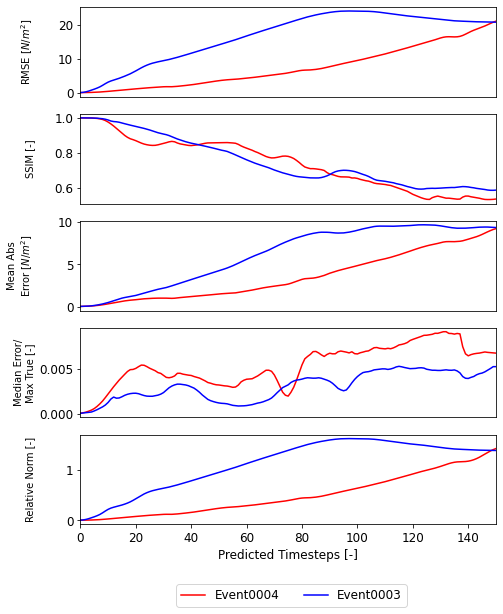

In [42]:
fig, axs = plt.subplots(5,1,figsize=(7,8))
axs = axs.ravel()

for (i, ax), metric in zip(enumerate(axs),metrics):
    for col, events in enumerate([events_train,events_test]):
        for event in events:
            for path in glob.glob(f'Edges_1/models_output/{event}/unet*.csv'): 

                df = pd.read_csv(path,index_col=0)

            ax.plot(df[metric],c=color[col])
            ax.tick_params(labelsize=12)
            ax.set_xlim(0,150)

    # Set TitleName
    ax.set_ylabel(metrics_names[i])

axs[-1].set_xlabel('Predicted Timesteps [-]',fontsize=12)

for ax in axs[:-1]:
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

plt.tight_layout()
fig.align_ylabels()

plt.legend(labels=['Event0004', 'Event0003'],bbox_to_anchor=(0.8,-0.6),ncol=2,fontsize=12)

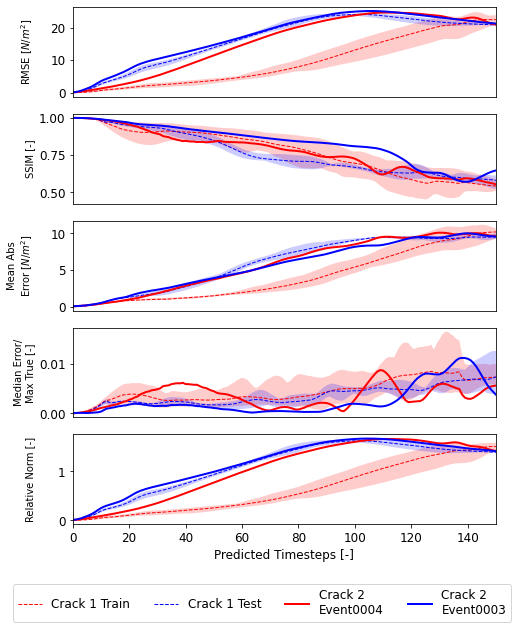

In [78]:
fig, axs = plt.subplots(5,1,figsize=(7,8))
axs = axs.ravel()

for (i, ax), metric in zip(enumerate(axs),metrics):

    events_train = ['Event0001','Event0002','Event0004','Event0006','Event0007','Event0008','Event0010','Event0011']
    events_test = ['Event0000','Event0003','Event0005','Event0009']
    for col, events in enumerate([events_train,events_test]):
        df_norm = pd.DataFrame()
        for event in events:
            for path in glob.glob(f'Edges_1/models_output/{event}/unet*.csv'): 

                df = pd.read_csv(path,index_col=0)

                df_norm[path.split('/')[2].split('\\')[0]] = df[metric]

        ax.plot(df_norm.mean(axis=1),c=color[col],linestyle='--',linewidth=1)
        ax.fill_between(df_norm.index,df_norm.min(axis=1),df_norm.max(axis=1),facecolor=color[col],alpha=0.2)
        ax.tick_params(labelsize=12)
        ax.set_xlim(0,150)

    events_train = ['Event0004']
    events_test = ['Event0003']
    for col, events in enumerate([events_train,events_test]):
        for event in events:
            for path in glob.glob(f'Edges_2/models_output/{event}/unet*.csv'): 

                df = pd.read_csv(path,index_col=0)

            ax.plot(df[metric],c=color[col],linewidth=2)
            ax.tick_params(labelsize=12)
            ax.set_xlim(0,150)

    # Set TitleName
    ax.set_ylabel(metrics_names[i])

axs[-1].set_xlabel('Predicted Timesteps [-]',fontsize=12)

for ax in axs[:-1]:
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

plt.tight_layout()
fig.align_ylabels()

plt.legend(labels=['Crack 1 Train','Crack 1 Test','Crack 2\nEvent0004','Crack 2\nEvent0003'],bbox_to_anchor=(1.05,-0.6),ncol=4,fontsize=12)

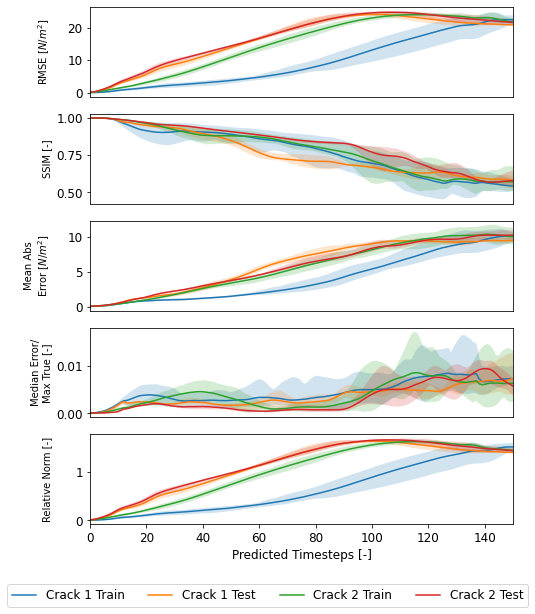

In [77]:
fig, axs = plt.subplots(5,1,figsize=(7,8))
axs = axs.ravel()

for (i, ax), metric in zip(enumerate(axs),metrics):

    events_train = ['Event0001','Event0002','Event0004','Event0006','Event0007','Event0008','Event0010','Event0011']
    events_test = ['Event0000','Event0003','Event0005','Event0009']
    for col, events in enumerate([events_train,events_test]):
        df_norm = pd.DataFrame()
        for event in events:
            for path in glob.glob(f'Edges_1/models_output/{event}/unet*.csv'): 

                df = pd.read_csv(path,index_col=0)

                df_norm[path.split('/')[2].split('\\')[0]] = df[metric]

        ax.plot(df_norm.mean(axis=1))
        ax.fill_between(df_norm.index,df_norm.min(axis=1),df_norm.max(axis=1),alpha=0.2)
        ax.tick_params(labelsize=12)
        ax.set_xlim(0,150)

    events_train = ['Event0001','Event0002','Event0004','Event0006','Event0007','Event0008','Event0010','Event0011']
    events_test = ['Event0000','Event0003','Event0005','Event0009']
    for col, events in enumerate([events_train,events_test]):
        df_norm = pd.DataFrame()
        for event in events:
            for path in glob.glob(f'Edges_2/models_output/{event}/unet*.csv'): 

                df = pd.read_csv(path,index_col=0)

                df_norm[path.split('/')[2].split('\\')[0]] = df[metric]

        ax.plot(df_norm.mean(axis=1))
        ax.fill_between(df_norm.index,df_norm.min(axis=1),df_norm.max(axis=1),alpha=0.2)
        ax.tick_params(labelsize=12)
        ax.set_xlim(0,150)

    # Set TitleName
    ax.set_ylabel(metrics_names[i])

axs[-1].set_xlabel('Predicted Timesteps [-]',fontsize=12)

for ax in axs[:-1]:
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

plt.tight_layout()
fig.align_ylabels()

plt.legend(labels=['Crack 1 Train','Crack 1 Test','Crack 2 Train', 'Crack 2 Test'],bbox_to_anchor=(1.05,-0.6),ncol=4,fontsize=12)